<a href="https://colab.research.google.com/github/SalmanRafiullah/EAI6000/blob/master/Week_3_Lab_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab we will train a neural network model to classify images of clothing. 

The lab is designed to be run using Google Colab, but also can be run as a normal jupyter notebook with minor modifications.

This lab uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers



print(tf.__version__)

Using TensorFlow backend.


2.1.0


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Creating a dictionary of classses mapping class numbers to class labels
my_dict = dict(zip(np.arange(10),list(class_names)))

4423680/4422102 [==============================] - 0s 0us/step


Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 

In [4]:
print(f'The size of each image is {train_images[randint(0,60000)].size} with a shape of {train_images[5].shape}.')

The size of each image is 784 with a shape of (28, 28).


In [5]:
print(f'There are {np.unique(train_labels).size} categories.')

There are 10 categories.


In [6]:
print(f'There are  {len(train_images)} images in the training set.')
print(f'There are  {len(test_images)} images in the test set.')


There are  60000 images in the training set.
There are  10000 images in the test set.


In [7]:
Val_min, Val_max = np.amin(train_images), np.max(train_images)
print(f'The range of the array is from {Val_min} to {Val_max}.')

The range of the array is from 0 to 255.


Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [0]:
# Since values range from 0 to 255, dividing the features by 255 to resize them between 0 and 1
x_train = train_images.reshape(60000, 784).astype('float32')/255
x_test = test_images.reshape(10000, 784).astype('float32')/255

# Converting the dependant variable to float
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


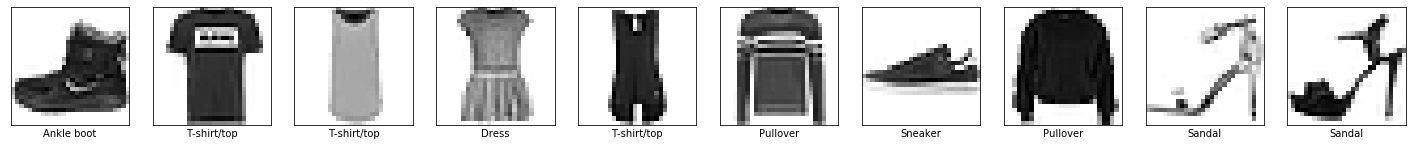

In [9]:
fig, axes = plt.subplots(1,10, figsize=(25,10))
for i in range(10):
  axes[i].imshow(x_train[i].reshape(28,28), cmap=plt.cm.gray_r)
  axes[i].set_xlabel(class_names[int(train_labels[i])])
  axes[i].set_xticks(())
  axes[i].set_yticks(())
plt.show()

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [0]:
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train the model on the training images for 20 epochs.




In [13]:
print('# Fit model on training data')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20)

print('\nhistory dict:', history.history)

# Fit model on training data
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5501 - sparse_categorical_accuracy: 0.8053
Epoch 2/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3886 - sparse_categorical_accuracy: 0.8589
Epoch 3/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3527 - sparse_categorical_accuracy: 0.8718
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3295 - sparse_categorical_accuracy: 0.8808
Epoch 5/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3113 - sparse_categorical_accuracy: 0.8852
Epoch 6/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3003 - sparse_categorical_accuracy: 0.8901
Epoch 7/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2906 - sparse_categorical_accuracy: 0.8940
Epoch 8/20
60000/60000 [==============================] - 3s 43us/

Evaluate the accuracy of the model on the test dataset. How does it compare with the training accuracy? Is it likely overfitting or underfitting?

In [14]:
print('# Accuracy of model on test dataset\n')
results = model.evaluate(x_test,y_test,batch_size=64)
print(results)

# Accuracy of model on test dataset

10000/10000 [==============================] - 0s 31us/sample - loss: 0.4530 - sparse_categorical_accuracy: 0.8631
[0.4529523473739624, 0.8631]




> The model has a lower accuracy and a higher loss on the test dataset than the training dataset. The model is likely overfitting on the training dataset.


In [15]:
# Re train the model with dropout to avoid overfitting and have equal accuracy and loss in training and test datasets
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_11')(inputs)
# Setting dropout as 0.4 after iteratively running the model for various values
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation='relu', name='dense_21')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(10, name='predictions')(x)
model1 = keras.Model(inputs=inputs, outputs=outputs)

model1.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

history = model1.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20)
print(f'\n {history.history}')

print('\n# Accuracy of model on test dataset\n')
results = model1.evaluate(x_test,y_test,batch_size=64)
print(results)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.7942 - sparse_categorical_accuracy: 0.7191
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5509 - sparse_categorical_accuracy: 0.8074
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5100 - sparse_categorical_accuracy: 0.8249
Epoch 4/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4950 - sparse_categorical_accuracy: 0.8319
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4851 - sparse_categorical_accuracy: 0.8362
Epoch 6/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4755 - sparse_categorical_accuracy: 0.8384
Epoch 7/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4711 - sparse_categorical_accuracy: 0.8435
Epoch 8/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4729 - spars

## Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [0]:
probability_model = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
class_predictions = model1.predict(x_test)
prediction_probabilities = probability_model.predict(x_test)
y_pred = np.argmax(class_predictions,axis=-1)

Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

In [17]:
print(f'The shape of class_predictions is : {class_predictions.shape}')
print(f"The shape of the variable 'prediction_probabilities' is : {prediction_probabilities.shape}")

The shape of class_predictions is : (10000, 10)
The shape of the variable 'prediction_probabilities' is : (10000, 10)




> The shapes of class_predictions and prediction_probabiltites are same. These are the 10000 test data points and the dimensions correspond to 1 vs rest binary (multiclass) probabiltities and the probability of predicting in the class respectively.



The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [0]:
def plot_image(i, predictions_array1, true_label1, img):
  fig, axes = plt.subplots(1,25,figsize=(50,5))
  
  class_mult = np.arange(10)
  predictions_array = np.round(predictions_array1,0) * class_mult

  for p,ax in enumerate(axes):
    true_label = true_label1[i[p]]

    m = ax.imshow(img[i[p]], cmap=plt.cm.binary)

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    predicted_label = np.argmax(predictions_array[i[p]])
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    ax.set_xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  round(100*np.max(predictions_array1[i[p]]),2),
                                  class_names[true_label]),
                                  color=color)
    
def plot_value_array(i, predictions_array1, true_label1):
  fig, axes = plt.subplots(1,25,figsize=(50,5))
  for p,ax in enumerate(axes):
    predictions_array, true_label = predictions_array1[i[p]], true_label1[i[p]]
    ax.grid(False)


    ax.set_xticks(np.arange(10))
    ax.set_xticklabels(my_dict.values(),rotation = 90,multialignment='left',linespacing=0.1,minor=False)

    ax.set_yticks([])
    thisplot = ax.bar(range(10), predictions_array, color="#777777")
    #ax.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

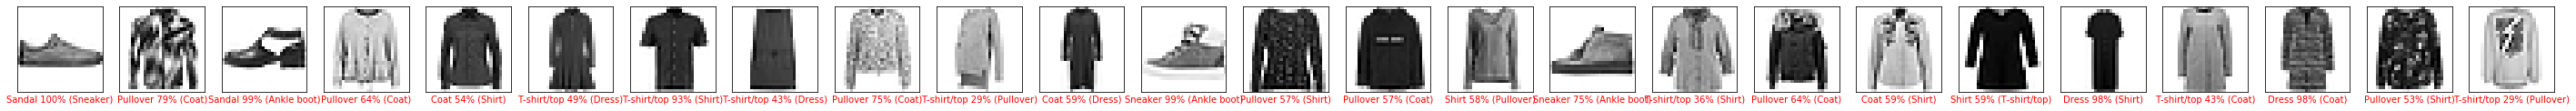

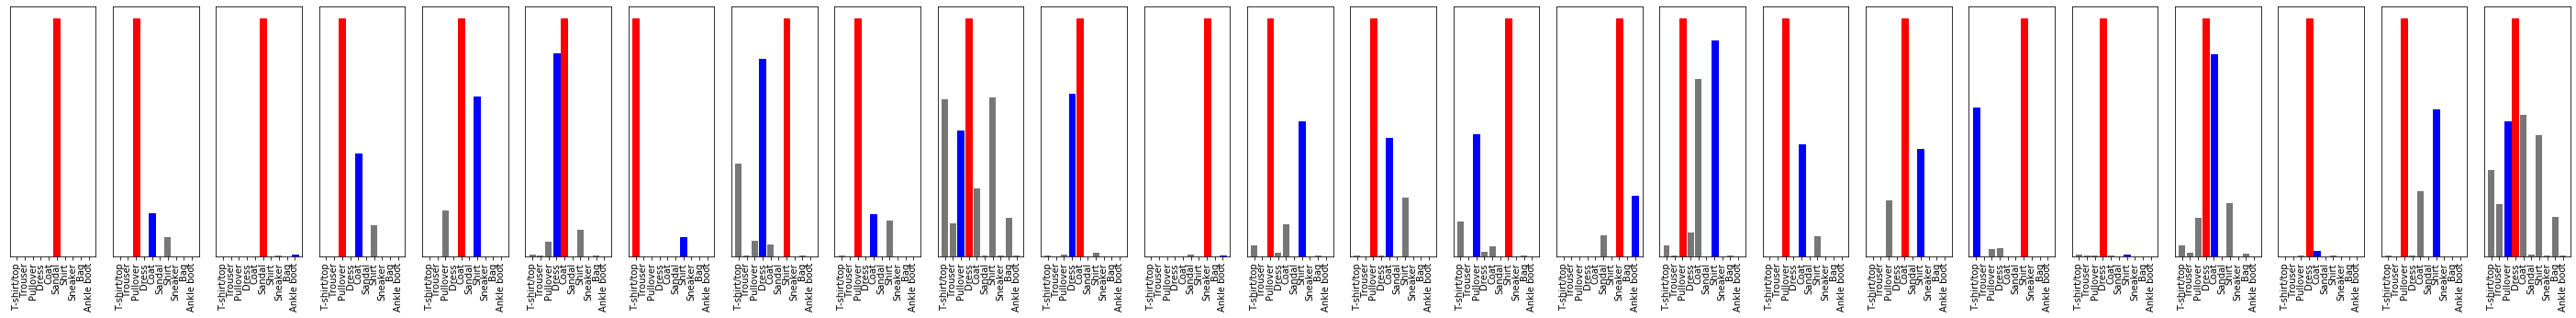

In [19]:
# Take a subset of 25 values to display
misclassified_subset = np.where(y_pred != y_test)[0][:25]

plot_image(misclassified_subset,prediction_probabilities,test_labels,test_images)
plot_value_array(misclassified_subset,prediction_probabilities,test_labels)



> Images that do not have a distinct shape to be distinguished from other classes tend to be misclassified. Images of 'Sandal', 'Sneaker' and 'Ankle boots' for example are often miscalssified amongst each other.



Plot a confusion matrix of the predictions. Which misclassifications are the most common?

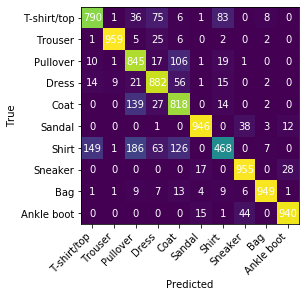

In [20]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(my_dict.values()), rotation=45, ha="right")
ax.set_yticklabels(list(my_dict.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")



> Classification of images that are very similar in shape tend to be misclassified. The classes Shirt and Pullover are largely misclassified as T-shirt and Coat respectively due to similarity in shape between them.

